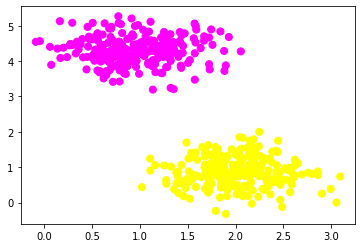

In [10]:

# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
 
# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
# plotting scatters
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show()

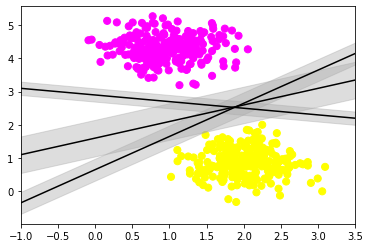

In [8]:
# creating linspace between -1 to 3.5
xfit = np.linspace(-1, 3.5)
 
# plotting scatter
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')
 
# plot a line between the different sets of data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
    color='#AAAAAA', alpha=0.4)
 
plt.xlim(-1, 3.5);
plt.show()

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [12]:
# linear data
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

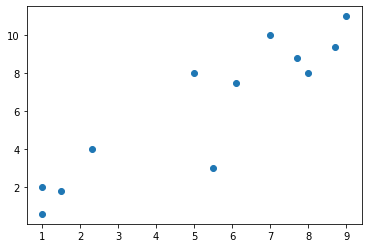

In [13]:
# show unclassified data
plt.scatter(X, y)
plt.show()

In [14]:
# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [15]:
# define the model
clf = svm.SVC(kernel='linear', C=1.0)

In [16]:
# train the model
clf.fit(training_X, training_y)

SVC(kernel='linear')

No handles with labels found to put in legend.


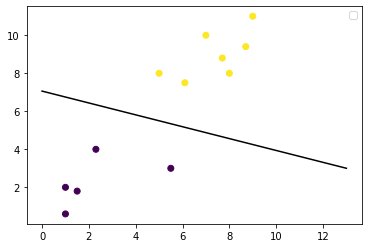

In [17]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend()
plt.show()

Non Linear

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

In [20]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

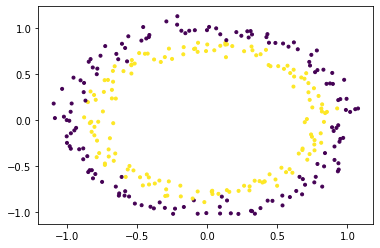

In [21]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [22]:
# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

In [23]:
# training non-linear model
nonlinear_clf.fit(circle_X, circle_y)

SVC()

In [24]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

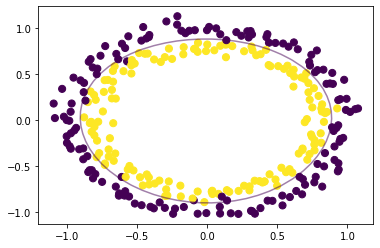

In [25]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()